In [ ]:
    import cv2
    import numpy as np
    import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded_Decktop = files.upload()

Saving img3.jpg to img3.jpg


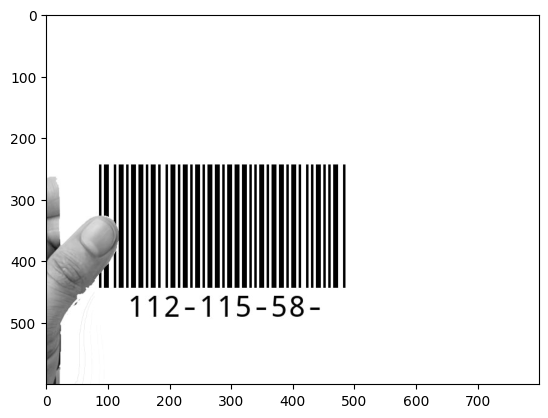

In [7]:
#put the uploaded image
img_filename = next(iter(uploaded_Decktop))
img = cv2.imread(img_filename)

# Convert the image from color to Grayscale
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray , cmap='gray')

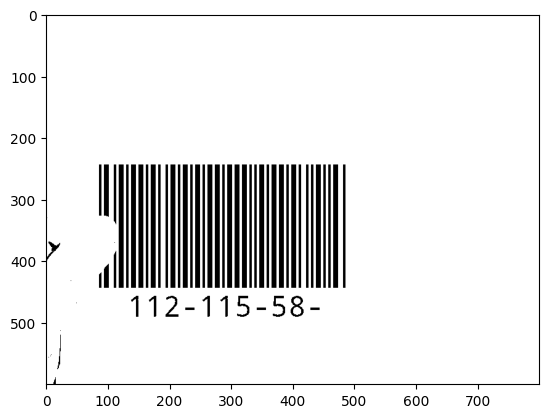

In [8]:
# binary threshold
_, thresholded_img = cv2.threshold(img_gray, 70, 255, cv2.THRESH_BINARY)

#adaptive
#thresholded_img = cv2.adaptiveThreshold(img_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 91, 19)

plt.imshow(thresholded_img, cmap='gray')


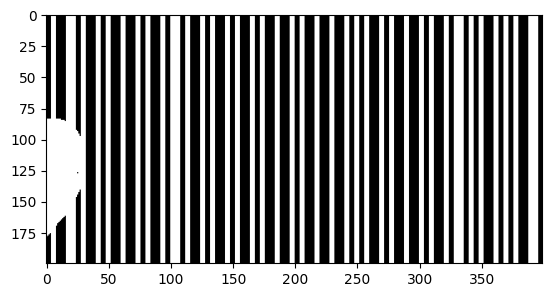

In [9]:

def cropped_image(image):
  # Use Canny edge detection
    edges = cv2.Canny(image, 50, 150)
    # Detect vertical lines using Hough Line Transform
    lines = cv2.HoughLinesP(edges, 1, np.pi / 180, threshold=100, minLineLength=197, maxLineGap=10)
    min_x, max_x, min_y, max_y = float('inf'), -float('inf'), float('inf'), -float('inf')

    if lines is not None:
        for line in lines:
            x1, y1, x2, y2 = line[0]
            # Vertical lines: x1 == x2 or nearly vertical
            if abs(x1 - x2) < 10:
                min_x = min(min_x, x1, x2)
                max_x = max(max_x, x1, x2)
                min_y = min(min_y, y1, y2)
                max_y = max(max_y, y1, y2)
            elif abs(y1 - y2) < 10:  # Horizontal lines
                min_x = min(min_x, x1, x2)
                max_x = max(max_x, x1, x2)
                min_y = min(min_y, y1, y2)
                max_y = max(max_y, y1, y2)

    if min_x != float('inf') and max_x != -float('inf') and min_y != float('inf') and max_y != -float('inf'):
        return image[min_y:max_y, min_x:max_x]
cropped_image = cropped_image(thresholded_img)
plt.imshow(cropped_image, cmap='gray')


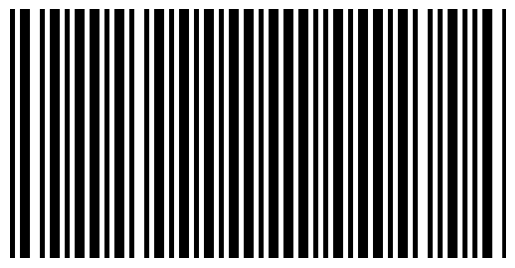

In [10]:
def apply_opening(image, kernel_size=(5, 5)):

    # Create a structuring element (kernel) for erosion and dilation
    kernel = np.ones(kernel_size, np.uint8)

    # Apply the opening operation: erosion followed by dilation
    opened_image = cv2.morphologyEx(image, cv2.MORPH_OPEN, kernel)

    return opened_image

kernel_size = (150, 1)
opened_image = apply_opening(cropped_image, kernel_size)

# Display the result
plt.imshow(opened_image, cmap='gray')
plt.axis('off')
plt.show()
